<a href="https://colab.research.google.com/github/aeri-12/ujicoba/blob/main/Tubes_Fix_Telkom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVM Kernel Linear

In [1]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Baca data historis harga saham Telkom dari file csv
data = pd.read_csv('/content/TLKM.JK (2).csv')
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-07-13,4080.0,4100.0,3970.0,4020.0,3325.441895,120852800.0
1,2018-07-16,3970.0,4030.0,3860.0,3940.0,3259.263916,66229700.0
2,2018-07-17,3970.0,3970.0,3890.0,3940.0,3259.263916,53740400.0
3,2018-07-18,3910.0,4030.0,3890.0,4010.0,3317.169189,75157800.0
4,2018-07-19,4000.0,4000.0,3910.0,3910.0,3234.447021,65340900.0


In [3]:
# Cek dan handling missing values
data.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [4]:
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.shape

(1236, 7)

In [7]:
# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

In [8]:
# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

In [9]:
# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

In [10]:
# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [11]:
# Membangun model SVM
model = SVR(kernel='linear')

In [12]:
# Melatih model
model.fit(X_train.reshape(-1, time_steps), y_train.ravel())

SVR(kernel='linear')

In [13]:
# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train.reshape(-1, time_steps))
y_val_pred = model.predict(X_val.reshape(-1, time_steps))
y_test_pred = model.predict(X_test.reshape(-1, time_steps))

In [14]:
# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

In [15]:
# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

MAE Train: 77.40
MAE Validation: 87.10
MAE Test: 82.39


In [16]:
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

MAPE Train: 2.21%
MAPE Validation: 2.08%
MAPE Test: 1.97%


In [17]:
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

MSE Train: 8964.42
MSE Validation: 12400.60
MSE Test: 10390.06


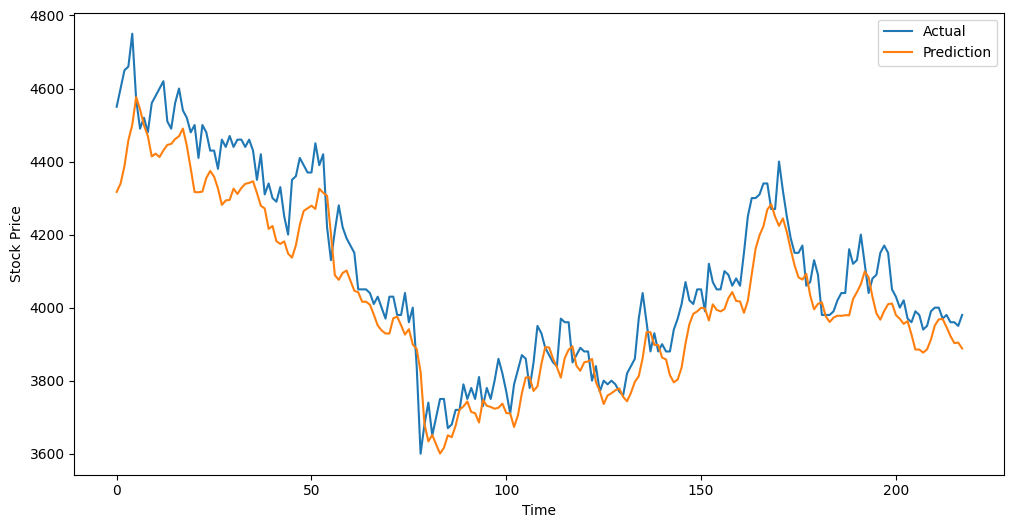

In [18]:
# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# SVM Kernel RBF dan Polynomial

Metrik Akurasi untuk Model dengan Kernel Polynomial:
MAE Train: 145.15
MAE Validation: 292.56
MAE Test: 253.82
MAPE Train: 4.17%
MAPE Validation: 6.98%
MAPE Test: 5.96%
MSE Train: 29455.98
MSE Validation: 143067.22
MSE Test: 127392.90

Metrik Akurasi untuk Model dengan Kernel RBF:
MAE Train: 86.12
MAE Validation: 191.07
MAE Test: 168.92
MAPE Train: 2.47%
MAPE Validation: 4.41%
MAPE Test: 3.93%
MSE Train: 10777.53
MSE Validation: 78438.19
MSE Test: 61835.21


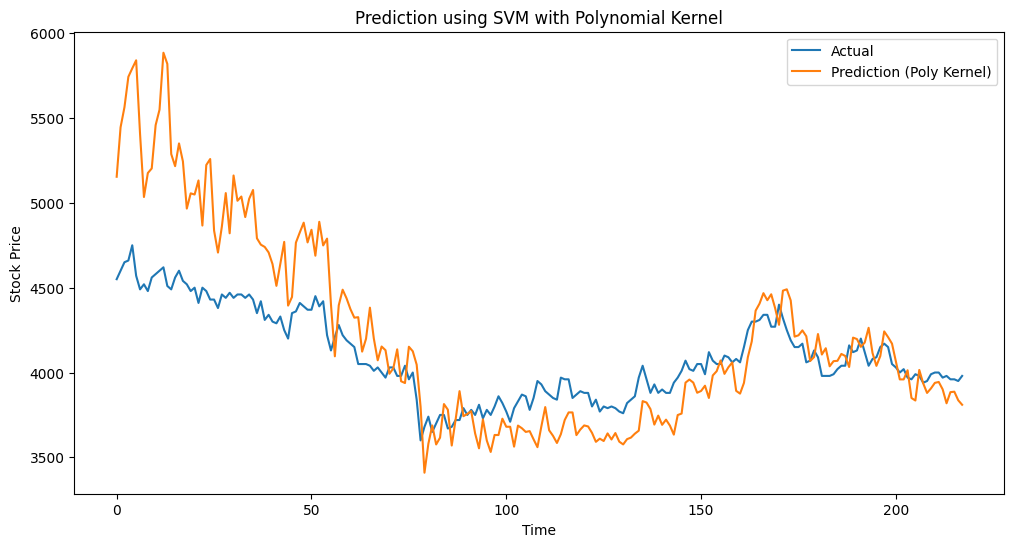

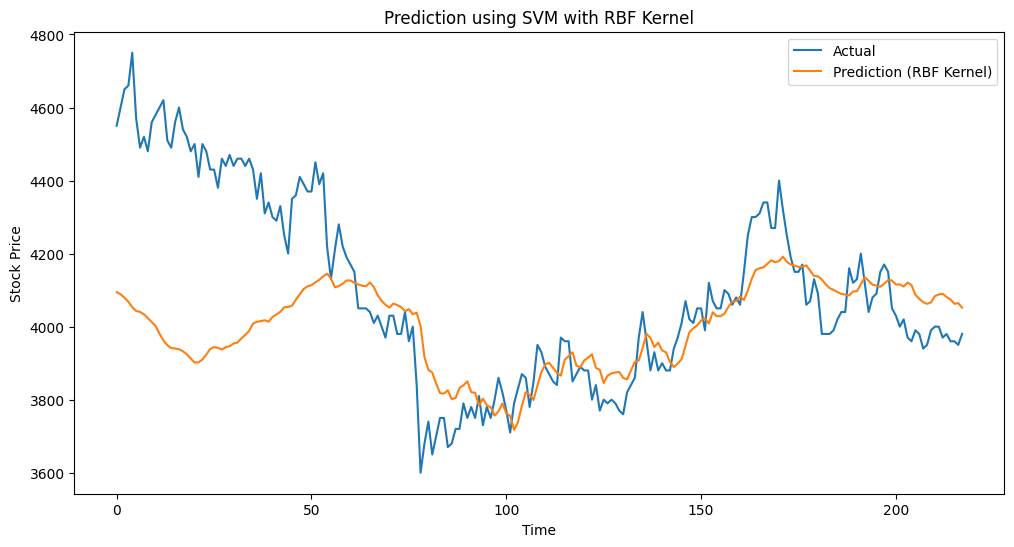

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model SVM dengan kernel polynomial (degree=3)
model_poly = SVR(kernel='poly', degree=3)

# Membangun model SVM dengan kernel radial basis function (RBF)
model_rbf = SVR(kernel='rbf')

# Melatih model dengan kernel polynomial
model_poly.fit(X_train.reshape(-1, time_steps), y_train.ravel())

# Melatih model dengan kernel RBF
model_rbf.fit(X_train.reshape(-1, time_steps), y_train.ravel())

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred_poly = model_poly.predict(X_train.reshape(-1, time_steps))
y_val_pred_poly = model_poly.predict(X_val.reshape(-1, time_steps))
y_test_pred_poly = model_poly.predict(X_test.reshape(-1, time_steps))

y_train_pred_rbf = model_rbf.predict(X_train.reshape(-1, time_steps))
y_val_pred_rbf = model_rbf.predict(X_val.reshape(-1, time_steps))
y_test_pred_rbf = model_rbf.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred_poly = scaler.inverse_transform(y_train_pred_poly.reshape(-1, 1))
y_val_pred_poly = scaler.inverse_transform(y_val_pred_poly.reshape(-1, 1))
y_test_pred_poly = scaler.inverse_transform(y_test_pred_poly.reshape(-1, 1))

y_train_pred_rbf = scaler.inverse_transform(y_train_pred_rbf.reshape(-1, 1))
y_val_pred_rbf = scaler.inverse_transform(y_val_pred_rbf.reshape(-1, 1))
y_test_pred_rbf = scaler.inverse_transform(y_test_pred_rbf.reshape(-1, 1))

y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi untuk model dengan kernel polynomial
mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)
mae_val_poly = mean_absolute_error(y_val, y_val_pred_poly)
mae_test_poly = mean_absolute_error(y_test, y_test_pred_poly)

mape_train_poly = np.mean(np.abs((y_train - y_train_pred_poly) / y_train)) * 100
mape_val_poly = np.mean(np.abs((y_val - y_val_pred_poly) / y_val)) * 100
mape_test_poly = np.mean(np.abs((y_test - y_test_pred_poly) / y_test)) * 100

mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
mse_val_poly = mean_squared_error(y_val, y_val_pred_poly)
mse_test_poly = mean_squared_error(y_test, y_test_pred_poly)

# Menghitung metrik akurasi untuk model dengan kernel RBF
mae_train_rbf = mean_absolute_error(y_train, y_train_pred_rbf)
mae_val_rbf = mean_absolute_error(y_val, y_val_pred_rbf)
mae_test_rbf = mean_absolute_error(y_test, y_test_pred_rbf)

mape_train_rbf = np.mean(np.abs((y_train - y_train_pred_rbf) / y_train)) * 100
mape_val_rbf = np.mean(np.abs((y_val - y_val_pred_rbf) / y_val)) * 100
mape_test_rbf = np.mean(np.abs((y_test - y_test_pred_rbf) / y_test)) * 100

mse_train_rbf = mean_squared_error(y_train, y_train_pred_rbf)
mse_val_rbf = mean_squared_error(y_val, y_val_pred_rbf)
mse_test_rbf = mean_squared_error(y_test, y_test_pred_rbf)

print("Metrik Akurasi untuk Model dengan Kernel Polynomial:")
print(f"MAE Train: {mae_train_poly:.2f}")
print(f"MAE Validation: {mae_val_poly:.2f}")
print(f"MAE Test: {mae_test_poly:.2f}")

print(f"MAPE Train: {mape_train_poly:.2f}%")
print(f"MAPE Validation: {mape_val_poly:.2f}%")
print(f"MAPE Test: {mape_test_poly:.2f}%")

print(f"MSE Train: {mse_train_poly:.2f}")
print(f"MSE Validation: {mse_val_poly:.2f}")
print(f"MSE Test: {mse_test_poly:.2f}")

print("\nMetrik Akurasi untuk Model dengan Kernel RBF:")
print(f"MAE Train: {mae_train_rbf:.2f}")
print(f"MAE Validation: {mae_val_rbf:.2f}")
print(f"MAE Test: {mae_test_rbf:.2f}")

print(f"MAPE Train: {mape_train_rbf:.2f}%")
print(f"MAPE Validation: {mape_val_rbf:.2f}%")
print(f"MAPE Test: {mape_test_rbf:.2f}%")

print(f"MSE Train: {mse_train_rbf:.2f}")
print(f"MSE Validation: {mse_val_rbf:.2f}")
print(f"MSE Test: {mse_test_rbf:.2f}")

# Menampilkan grafik prediksi untuk model dengan kernel polynomial
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred_poly, label='Prediction (Poly Kernel)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Prediction using SVM with Polynomial Kernel')
plt.legend()
plt.show()

# Menampilkan grafik prediksi untuk model dengan kernel RBF
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred_rbf, label='Prediction (RBF Kernel)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Prediction using SVM with RBF Kernel')
plt.legend()
plt.show()

# Linear Regression

MAE Train: 49.52
MAE Validation: 52.33
MAE Test: 45.94
MAPE Train: 1.42%
MAPE Validation: 1.28%
MAPE Test: 1.12%
MSE Train: 4398.90
MSE Validation: 4947.09
MSE Test: 3495.05


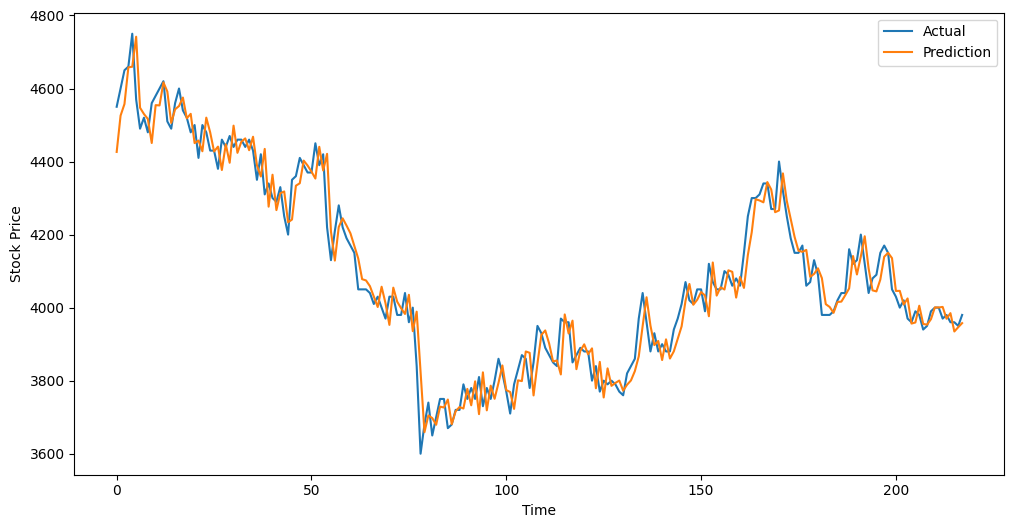

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model Regresi Linier
model = LinearRegression()

# Melatih model
model.fit(X_train.reshape(-1, time_steps), y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train.reshape(-1, time_steps))
y_val_pred = model.predict(X_val.reshape(-1, time_steps))
y_test_pred = model.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# LSTM 1 hidden layer

Epoch 1/100
23/23 [==============================] - 2s 27ms/step - loss: 0.0299 - val_loss: 0.0212
Epoch 2/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0053 - val_loss: 0.0039
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0035 - val_loss: 0.0026
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0031 - val_loss: 0.0026
Epoch 5/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0026
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0030 - val_loss: 0.0032
Epoch 8/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0028 - val_loss: 0.0025
Epoch 9/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0027 - val_loss: 0.0025
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 0.0027

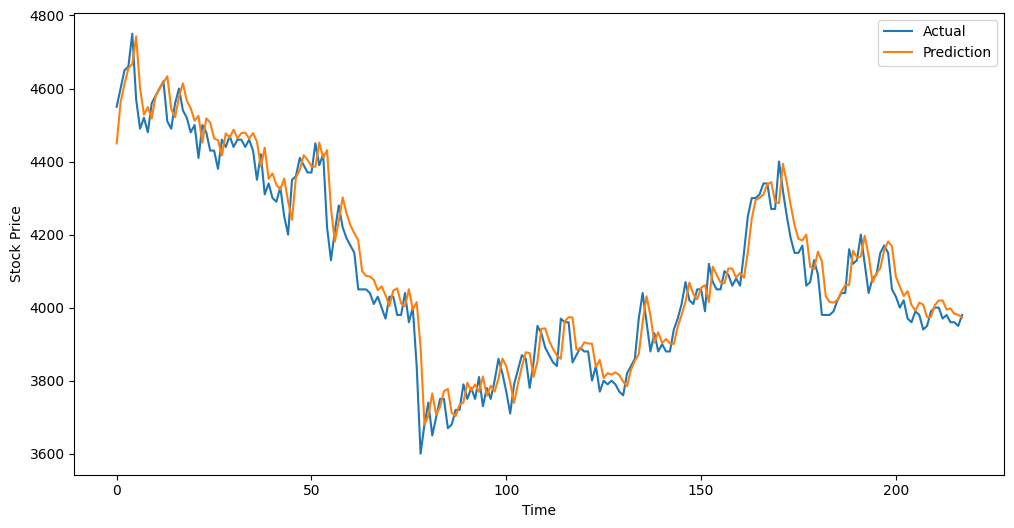

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape data ke bentuk [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# LSTM 2 hidden layer

Epoch 1/100
23/23 [==============================] - 4s 56ms/step - loss: 0.0370 - val_loss: 0.0150
Epoch 2/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0059 - val_loss: 0.0067
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0046 - val_loss: 0.0033
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 5/100
23/23 [==============================] - 1s 22ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0037 - val_loss: 0.0031
Epoch 7/100
23/23 [==============================] - 1s 24ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 8/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0035 - val_loss: 0.0029
Epoch 9/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 10/100
23/23 [==============================] - 1s 23ms/step - loss: 0.0036 - val_loss: 0.0028

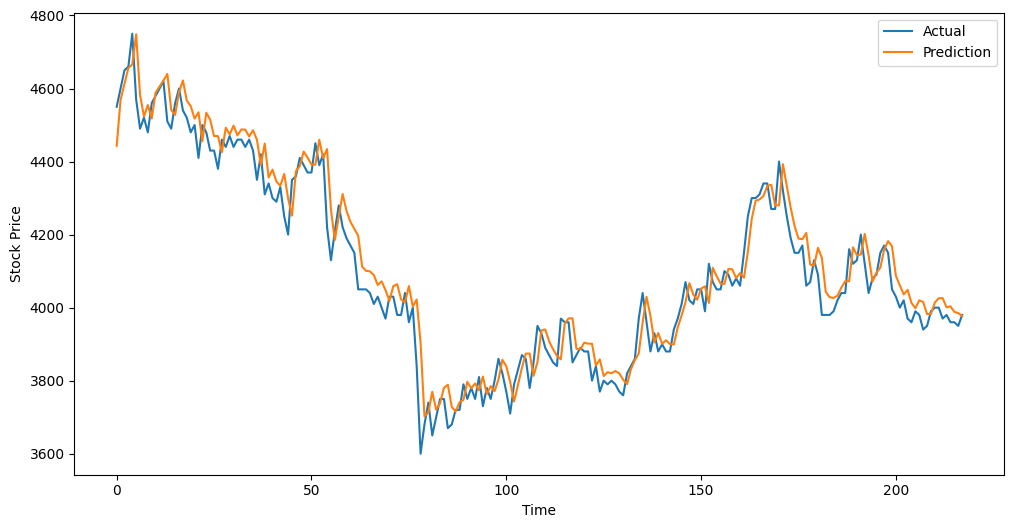

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape data ke bentuk [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# ARIMA

MAE Train: 492.83
MSE Train: 356279.30
MAPE Train: 13.03%
MAE Test: 230.44
MSE Test: 89207.70
MAPE Test: 5.40%


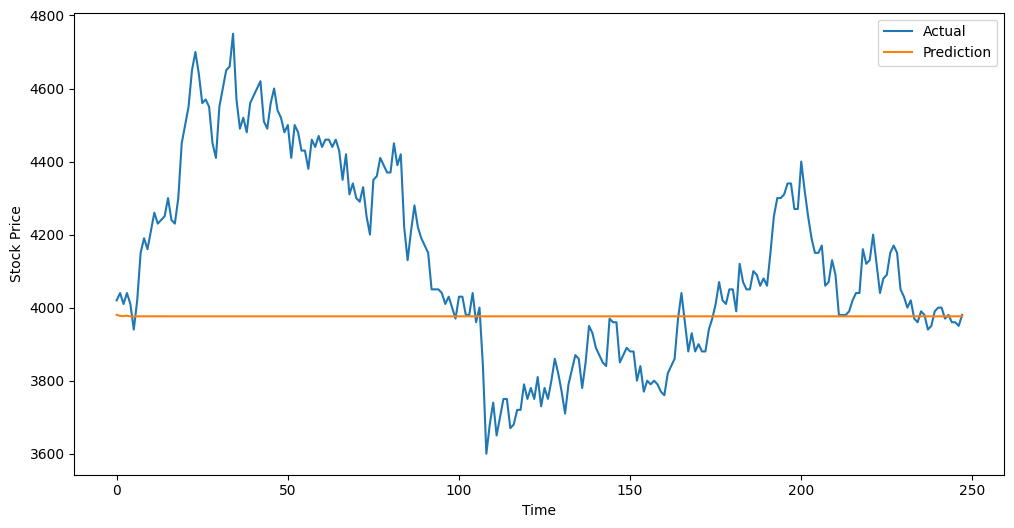

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data['Close'].values

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Fungsi untuk melakukan prediksi menggunakan ARIMA
def arima_predict(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(data))
    return forecast

# Melakukan prediksi menggunakan ARIMA pada data latih
order = (5, 1, 0)  # Sesuaikan dengan parameter yang sesuai dengan data
train_pred = arima_predict(train_data, order)

# Menghitung metrik akurasi pada data latih
mae_train = mean_absolute_error(train_data, train_pred)
mse_train = mean_squared_error(train_data, train_pred)
mape_train = np.mean(np.abs((train_data - train_pred) / train_data)) * 100

print(f"MAE Train: {mae_train:.2f}")
print(f"MSE Train: {mse_train:.2f}")
print(f"MAPE Train: {mape_train:.2f}%")

# Melakukan prediksi menggunakan ARIMA pada data uji
test_pred = arima_predict(test_data, order)

# Menghitung metrik akurasi pada data uji
mae_test = mean_absolute_error(test_data, test_pred)
mse_test = mean_squared_error(test_data, test_pred)
mape_test = np.mean(np.abs((test_data - test_pred) / test_data)) * 100

print(f"MAE Test: {mae_test:.2f}")
print(f"MSE Test: {mse_test:.2f}")
print(f"MAPE Test: {mape_test:.2f}%")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best Order: (0, 0, 2)
MAE Train: 373.22
MSE Train: 191812.46
Best MAPE Test: 5.33%
MAPE Test: 5.33%


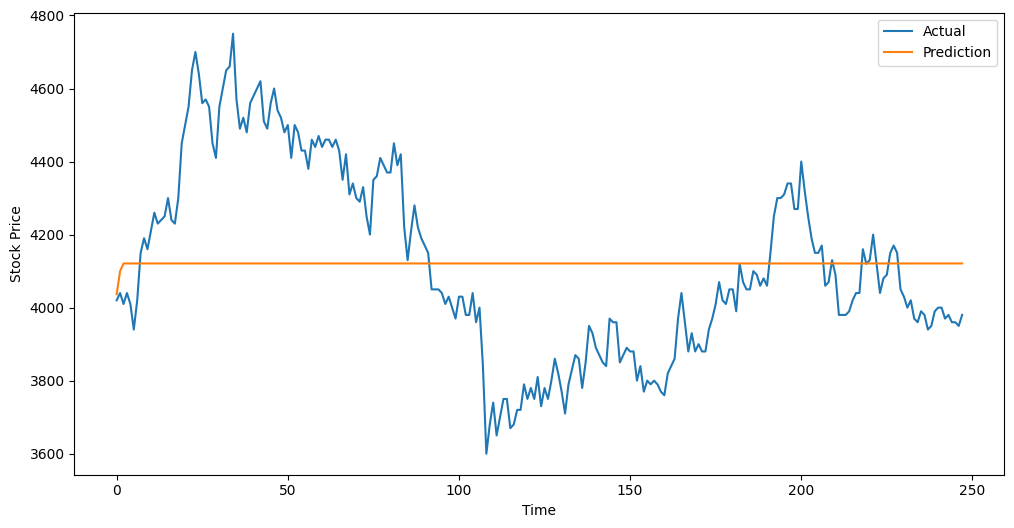

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/TLKM.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data['Close'].values

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Fungsi untuk melakukan prediksi menggunakan ARIMA
def arima_predict(data, order):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(data))
    return forecast

best_mape = float('inf')
best_order = None
best_train_pred = None
best_test_pred = None

# Melakukan iterasi pada berbagai kombinasi order ARIMA
for p in range(3):
    for d in range(3):
        for q in range(3):
            order = (p, d, q)
            train_pred = arima_predict(train_data, order)
            test_pred = arima_predict(test_data, order)

            # Menghitung metrik akurasi pada data uji
            mape_test = np.mean(np.abs((test_data - test_pred) / test_data)) * 100

            if mape_test < best_mape:
                best_mape = mape_test
                best_order = order
                best_train_pred = train_pred
                best_test_pred = test_pred

# Menghitung metrik akurasi pada data latih menggunakan order terbaik
train_pred = arima_predict(train_data, best_order)
mae_train = mean_absolute_error(train_data, train_pred)
mse_train = mean_squared_error(train_data, train_pred)

print("Best Order:", best_order)
print(f"MAE Train: {mae_train:.2f}")
print(f"MSE Train: {mse_train:.2f}")
print(f"Best MAPE Test: {best_mape:.2f}%")

# Menghitung MAPE pada data uji menggunakan order terbaik
mape_test = np.mean(np.abs((test_data - best_test_pred) / test_data)) * 100
print(f"MAPE Test: {mape_test:.2f}%")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(test_data, label='Actual')
plt.plot(best_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# Indosat

MAE Train: 403.08
MAE Validation: 230.06
MAE Test: 243.18
MAPE Train: 16.07%
MAPE Validation: 3.55%
MAPE Test: 3.39%
MSE Train: 190431.59
MSE Validation: 114194.10
MSE Test: 93017.43


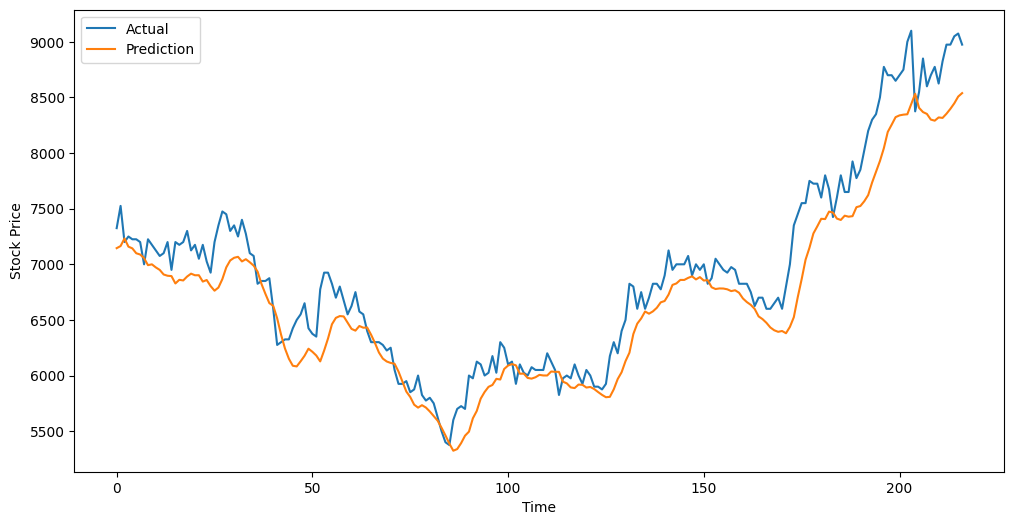

In [78]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Telkom dari file csv
df_xl = pd.read_csv('/content/ISAT.JK (2).csv')
df_xl.head(5)

# Cek dan handling missing values
df_xl.isnull().sum()
df_xl.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya
df_xl.isnull().sum()
df_xl.shape

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = df_xl[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]
# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model SVM
model_xl = SVR(kernel='linear')

# Melatih model
model_xl.fit(X_train.reshape(-1, time_steps), y_train.ravel())

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model_xl.predict(X_train.reshape(-1, time_steps))
y_val_pred = model_xl.predict(X_val.reshape(-1, time_steps))
y_test_pred = model_xl.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")
# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

MAE Train: 88.16
MAE Validation: 151.32
MAE Test: 112.33
MAPE Train: 2.85%
MAPE Validation: 2.40%
MAPE Test: 1.63%
MSE Train: 17548.94
MSE Validation: 44333.12
MSE Test: 21465.32


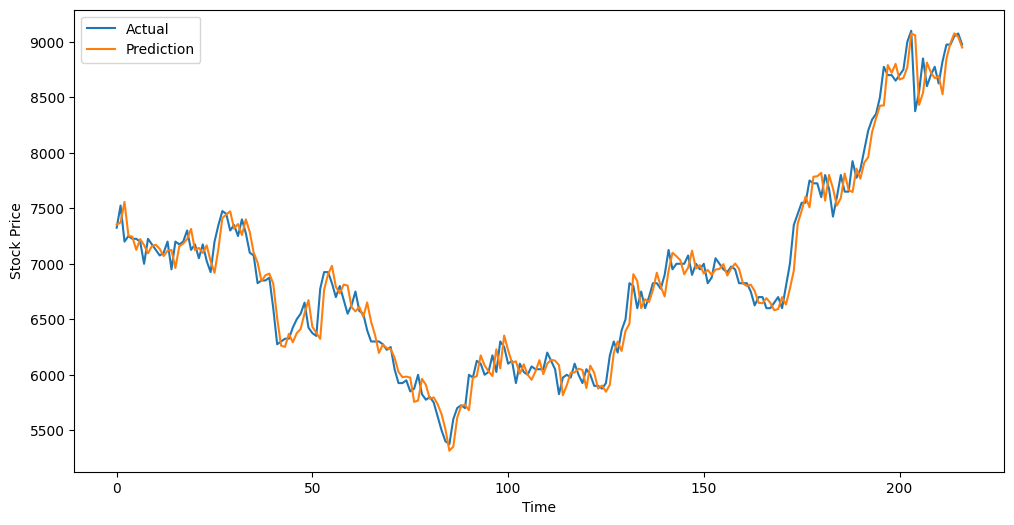

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/ISAT.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model Regresi Linier
model = LinearRegression()

# Melatih model
model.fit(X_train.reshape(-1, time_steps), y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train.reshape(-1, time_steps))
y_val_pred = model.predict(X_val.reshape(-1, time_steps))
y_test_pred = model.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
23/23 [==============================] - 48s 47ms/step - loss: 0.0170 - val_loss: 0.0113
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0024 - val_loss: 0.0031
Epoch 3/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0014 - val_loss: 0.0031
Epoch 4/100
23/23 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0037
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0012 - val_loss: 0.0033
Epoch 6/100
23/23 [==============================] - 0s 21ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 7/100
23/23 [==============================] - 0s 22ms/step - loss: 0.0011 - val_loss: 0.0029
Epoch 8/100
23/23 [==============================] - 1s 28ms/step - loss: 9.8775e-04 - val_loss: 0.0028
Epoch 9/100
23/23 [==============================] - 1s 26ms/step - loss: 9.6066e-04 - val_loss: 0.0029
Epoch 10/100
23/23 [==============================] - 1s 22ms/step - loss: 9.1178e-04 - val

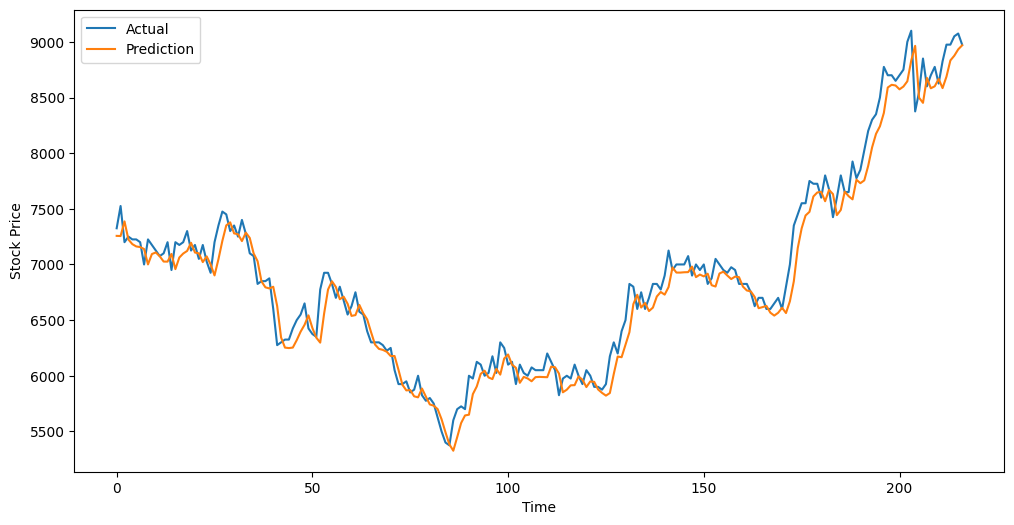

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/ISAT.JK (2).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape data ke bentuk [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# XL

MAE Train: 113.77
MAE Validation: 128.66
MAE Test: 66.95
MAPE Train: 4.20%
MAPE Validation: 4.35%
MAPE Test: 6.95%
MSE Train: 20376.84
MSE Validation: 24627.31
MSE Test: 27028.00


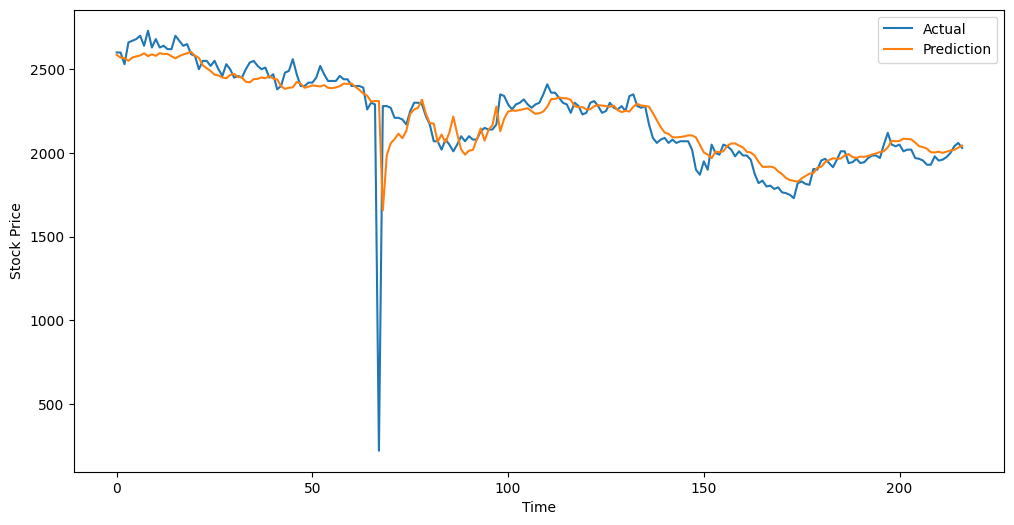

In [75]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Telkom dari file csv
df_xl = pd.read_csv('/content/EXCL.JK (1).csv')
df_xl.head(5)

# Cek dan handling missing values
df_xl.isnull().sum()
df_xl.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya
df_xl.isnull().sum()
df_xl.shape

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = df_xl[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]
# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model SVM
model_xl = SVR(kernel='linear')

# Melatih model
model_xl.fit(X_train.reshape(-1, time_steps), y_train.ravel())

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model_xl.predict(X_train.reshape(-1, time_steps))
y_val_pred = model_xl.predict(X_val.reshape(-1, time_steps))
y_test_pred = model_xl.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")
# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

MAE Train: 53.16
MAE Validation: 51.93
MAE Test: 68.61
MAPE Train: 2.10%
MAPE Validation: 1.82%
MAPE Test: 6.96%
MSE Train: 4929.72
MSE Validation: 4892.30
MSE Test: 45424.67


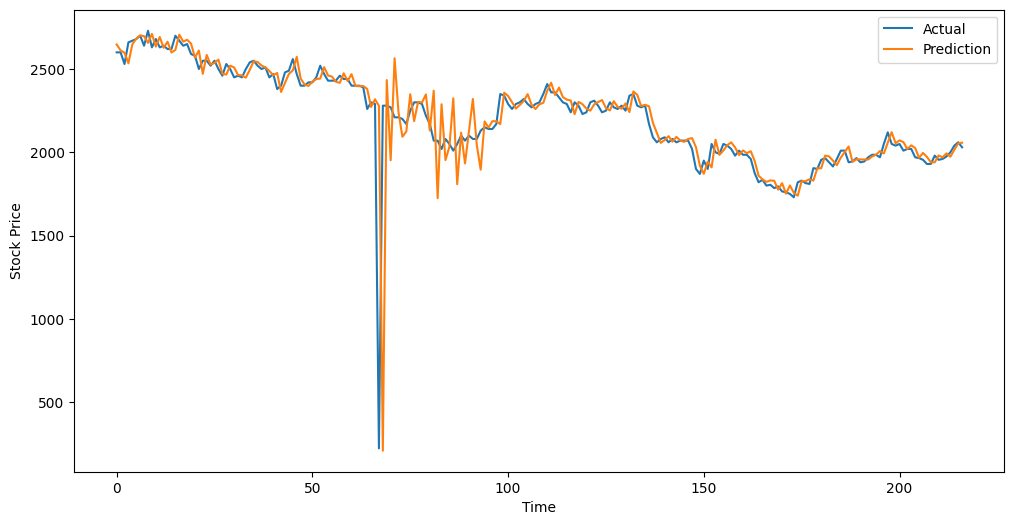

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/EXCL.JK (1).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model Regresi Linier
model = LinearRegression()

# Melatih model
model.fit(X_train.reshape(-1, time_steps), y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train.reshape(-1, time_steps))
y_val_pred = model.predict(X_val.reshape(-1, time_steps))
y_test_pred = model.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
23/23 [==============================] - 3s 45ms/step - loss: 0.1481 - val_loss: 0.0017
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0062 - val_loss: 0.0028
Epoch 3/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 4/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0025 - val_loss: 0.0016
Epoch 5/100
23/23 [==============================] - 0s 18ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 6/100
23/23 [==============================] - 0s 17ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 8/100
23/23 [==============================] - 0s 20ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 9/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0018 - val_loss: 0.0015

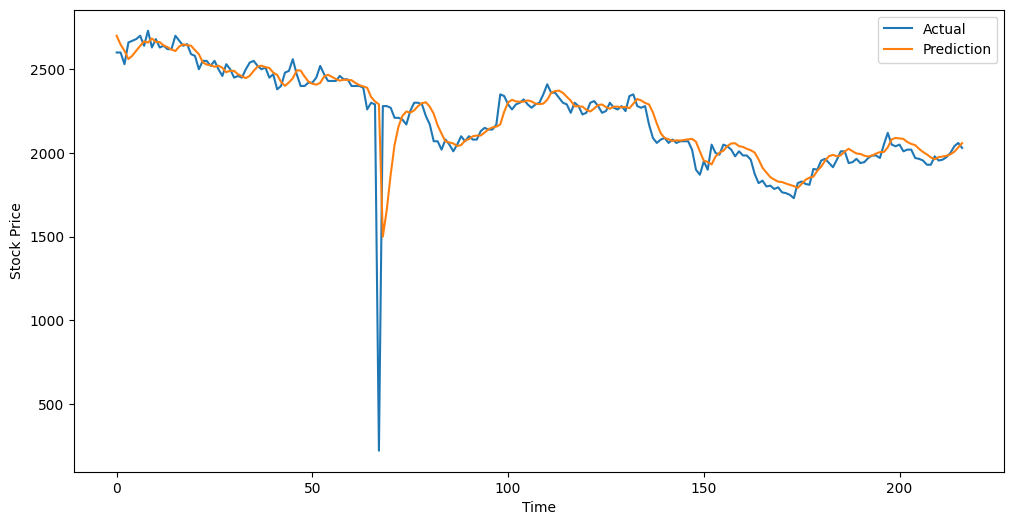

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/EXCL.JK (1).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape data ke bentuk [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

# SMARTFREN

MAE Train: 16.27
MAE Validation: 18.13
MAE Test: 21.45
MAPE Train: 16.42%
MAPE Validation: 20.51%
MAPE Test: 31.60%
MSE Train: 322.55
MSE Validation: 347.13
MSE Test: 465.25


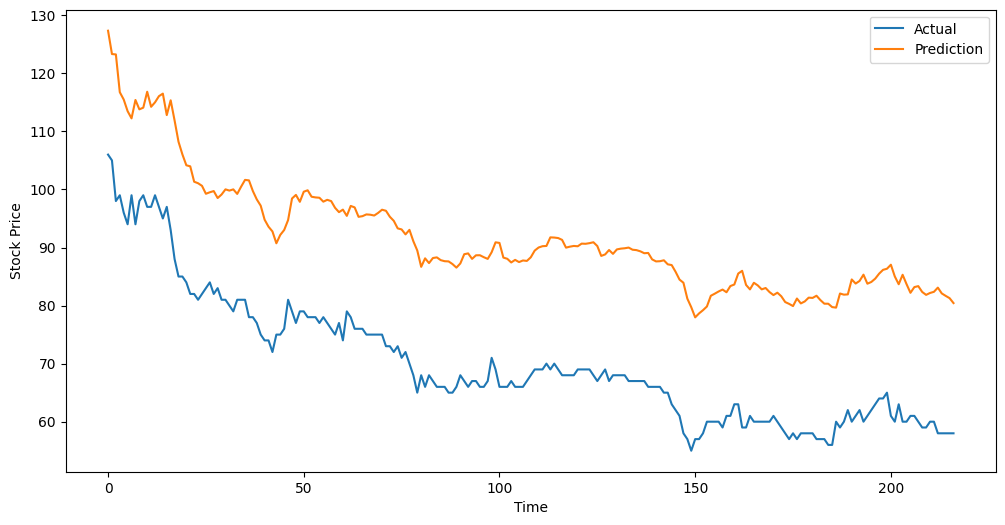

In [81]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Telkom dari file csv
df_xl = pd.read_csv('/content/FREN.JK (1).csv')
df_xl.head(5)

# Cek dan handling missing values
df_xl.isnull().sum()
df_xl.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya
df_xl.isnull().sum()
df_xl.shape

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = df_xl[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]
# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model SVM
model_xl = SVR(kernel='linear')

# Melatih model
model_xl.fit(X_train.reshape(-1, time_steps), y_train.ravel())

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model_xl.predict(X_train.reshape(-1, time_steps))
y_val_pred = model_xl.predict(X_val.reshape(-1, time_steps))
y_test_pred = model_xl.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")
mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")
mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")
# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

MAE Train: 4.79
MAE Validation: 2.58
MAE Test: 1.47
MAPE Train: 3.54%
MAPE Validation: 2.74%
MAPE Test: 2.06%
MSE Train: 68.51
MSE Validation: 11.34
MSE Test: 3.84


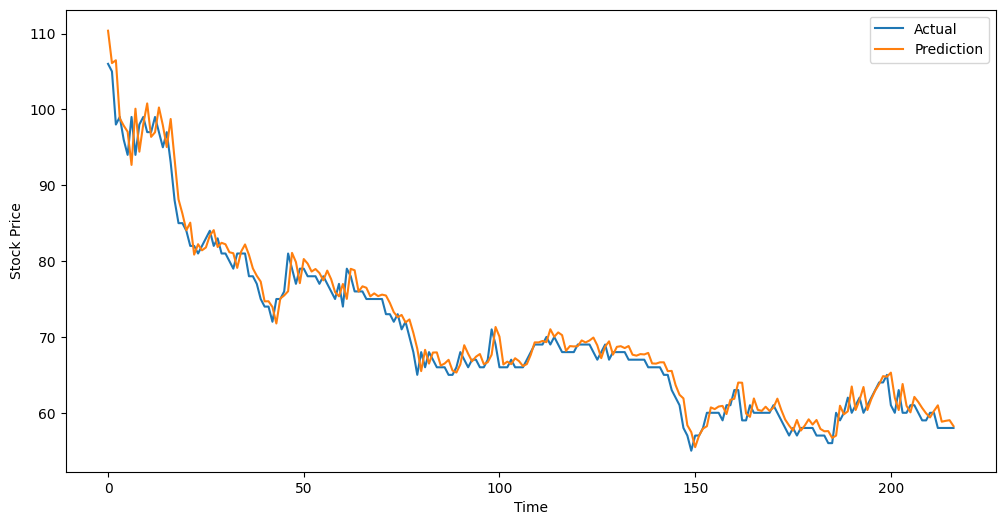

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/FREN.JK (1).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Membangun model Regresi Linier
model = LinearRegression()

# Melatih model
model.fit(X_train.reshape(-1, time_steps), y_train)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train.reshape(-1, time_steps))
y_val_pred = model.predict(X_val.reshape(-1, time_steps))
y_test_pred = model.predict(X_test.reshape(-1, time_steps))

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred.reshape(-1, 1))
y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

Epoch 1/100
23/23 [==============================] - 2s 26ms/step - loss: 0.0360 - val_loss: 0.0022
Epoch 2/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0061 - val_loss: 5.7618e-04
Epoch 3/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 3.9034e-04
Epoch 4/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0041 - val_loss: 5.1748e-04
Epoch 5/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0038 - val_loss: 4.1609e-04
Epoch 6/100
23/23 [==============================] - 0s 12ms/step - loss: 0.0034 - val_loss: 5.4666e-04
Epoch 7/100
23/23 [==============================] - 0s 10ms/step - loss: 0.0035 - val_loss: 6.9903e-04
Epoch 8/100
23/23 [==============================] - 0s 13ms/step - loss: 0.0030 - val_loss: 6.8214e-04
Epoch 9/100
23/23 [==============================] - 0s 11ms/step - loss: 0.0027 - val_loss: 4.5970e-04
Epoch 10/100
23/23 [==============================] - 0s 11ms/step -

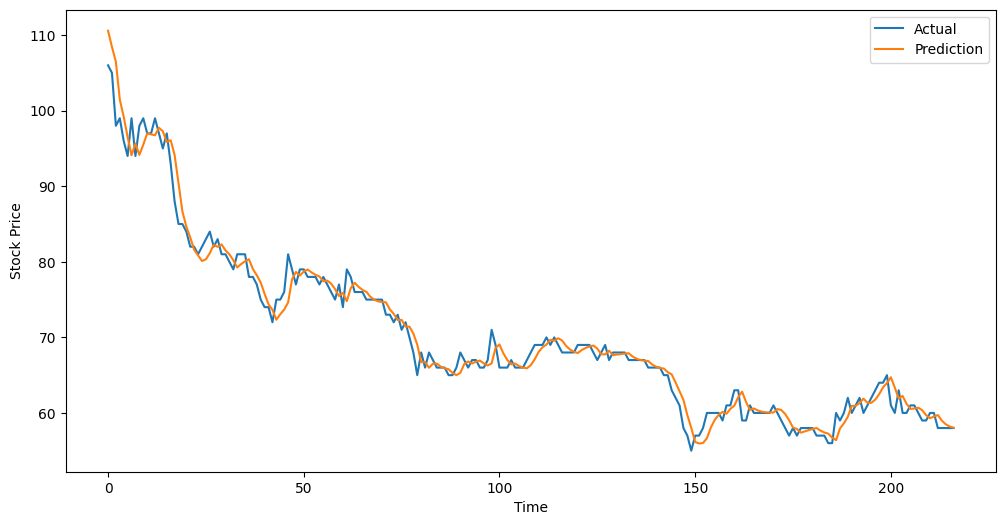

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Baca data historis harga saham Indosat dari file CSV (pastikan file sudah ada di direktori yang benar)
data = pd.read_csv('/content/FREN.JK (1).csv')

# Handling missing values
data.fillna(method='ffill', inplace=True)  # Mengisi missing values dengan data sebelumnya

# Ambil kolom 'Close' sebagai data yang akan diprediksi
stock_data = data[['Close']].values

# Normalisasi data
scaler = MinMaxScaler()
stock_data = scaler.fit_transform(stock_data)

# Tentukan jumlah data yang akan digunakan untuk latih, validasi, dan uji
total_data = len(stock_data)
train_size = int(total_data * 0.6)
val_size = int(total_data * 0.2)
test_size = total_data - train_size - val_size

# Bagi data menjadi data latih, validasi, dan uji
train_data = stock_data[:train_size]
val_data = stock_data[train_size:train_size + val_size]
test_data = stock_data[train_size + val_size:]

# Bagi data menjadi fitur (X) dan target (y)
def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 30  # Sesuaikan dengan panjang data historis yang ingin digunakan sebagai input model
X_train, y_train = create_dataset(train_data, time_steps)
X_val, y_val = create_dataset(val_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape data ke bentuk [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Membangun model LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Melatih model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=1)

# Membuat prediksi menggunakan model yang telah dilatih
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Mengembalikan data ke skala semula setelah prediksi
y_train_pred = scaler.inverse_transform(y_train_pred)
y_val_pred = scaler.inverse_transform(y_val_pred)
y_test_pred = scaler.inverse_transform(y_test_pred)
y_train = scaler.inverse_transform(y_train)
y_val = scaler.inverse_transform(y_val)
y_test = scaler.inverse_transform(y_test)

# Menghitung metrik akurasi
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
mape_val = np.mean(np.abs((y_val - y_val_pred) / y_val)) * 100
mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100

mse_train = mean_squared_error(y_train, y_train_pred)
mse_val = mean_squared_error(y_val, y_val_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"MAE Train: {mae_train:.2f}")
print(f"MAE Validation: {mae_val:.2f}")
print(f"MAE Test: {mae_test:.2f}")

print(f"MAPE Train: {mape_train:.2f}%")
print(f"MAPE Validation: {mape_val:.2f}%")
print(f"MAPE Test: {mape_test:.2f}%")

print(f"MSE Train: {mse_train:.2f}")
print(f"MSE Validation: {mse_val:.2f}")
print(f"MSE Test: {mse_test:.2f}")

# Menampilkan grafik prediksi
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_test_pred, label='Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()